In [1]:
# mount drive to work with google drive
# Mount Google Drive
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
%cd /content
os.chdir('/content/drive/MyDrive/AAAI/') #path was adjusted manually

Mounted at /content/drive/
/content


1. **Background Subtraction**:
   - If you're working with a video stream, first apply a background subtraction algorithm. This will give you the foreground objects in each frame. Tools like OpenCV have functions like `createBackgroundSubtractorMOG2()` for this.

## **Upload yor GIF**

In [2]:
!pip install imageio opencv-python


In [3]:
import os
import cv2
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt
from IPython.display import display, Image as IPImage
from google.colab import files

# Prompt user to upload GIF file
uploaded = files.upload()

# Get the name of the uploaded file
input_gif_name = list(uploaded.keys())[0]
print(input_gif_name)

# Ensure the file is saved in the specified directory
save_directory = "/content/drive/MyDrive/AAAI/"
save_path = os.path.join(save_directory, input_gif_name)
with open(save_path, 'wb') as f:
    f.write(uploaded[input_gif_name])

# Display the uploaded GIF
with open(save_path, "rb") as f:
    display(IPImage(data=f.read(), format='png'))

# Extract frames from the GIF
img = Image.open(save_path)
frames = [frame.copy() for frame in ImageSequence.Iterator(img)]
print(f"Number of frames in the GIF: {len(frames)}")

# Derive a directory to save the extracted frames
frame_save_directory = os.path.join(save_directory, "original_" + os.path.splitext(input_gif_name)[0])
if not os.path.exists(frame_save_directory):
    os.makedirs(frame_save_directory)

# Save frames
saved_paths = []
for idx, frame in enumerate(frames):
    frame_save_path = os.path.join(frame_save_directory, f"frame_{idx + 1}.png")
    frame.save(frame_save_path)
    saved_paths.append(frame_save_path)

# Display the saved frames
fig, axes = plt.subplots(1, len(frames), figsize=(50, 30))
for i, ax in enumerate(axes):
    ax.imshow(plt.imread(saved_paths[i]))
    ax.set_title(f"Frame {i + 1}")
    ax.axis('off')
plt.tight_layout()
plt.show()
print(frame_save_directory)
print(save_path)

Output hidden; open in https://colab.research.google.com to view.

In [4]:
import imageio
import cv2
import numpy as np
import os

# Read the GIF file
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# ... [previous code]

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours
    outline = cv2.drawContours(frame.copy(), contours, -1, (0, 255, 0), 2)

    # Ensure the outline has only 3 channels (RGB)
    outline = outline[:, :, :3]

    outlines.append(outline)
    print(len(outlines))
# Save the frames with outlines as a new GIF
outline_save_directory = os.path.join(save_directory, 'outlined_objects.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1)
print(outline_save_directory)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
/content/drive/MyDrive/AAAI/outlined_objects.gif


In [5]:
from IPython.display import Image

# Display the outlined GIF
Image(filename=outline_save_directory)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/outlined_objects.gif')


Output hidden; open in https://colab.research.google.com to view.

In [7]:
import imageio
import cv2
import os

# Load the GIF using imageio
gif = imageio.mimread(outline_save_directory)

# Define the minimum radius threshold
min_radius_threshold = 10  # Adjust this value as needed

processed_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process each contour
    for contour in contours:
        # Calculate the enclosing circle
        (x, y), radius = cv2.minEnclosingCircle(contour)

        # Check if the radius is above the threshold
        if radius > min_radius_threshold:
            # Draw the circle around the contour
            cv2.circle(image, (int(x), int(y)), int(radius), (0, 255, 0), 2)
        else:
            # Remove the contour from the image by filling it with the background color (white in this case)
            cv2.drawContours(image, [contour], 0, (255, 255, 255), -1)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    processed_frames.append(processed_frame)

# Save the processed frames as a new animated GIF using imageio
imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects.gif'), processed_frames, duration=0.1)

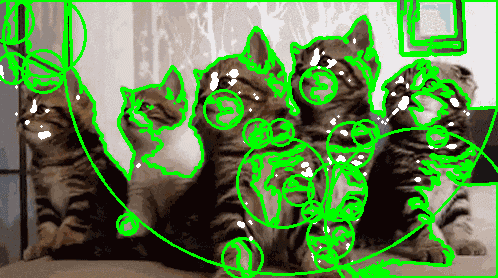

In [8]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/modified_outlined_objects.gif')

In [9]:
import imageio
import cv2
import os

# Load the GIF using imageio
gif = imageio.mimread(outline_save_directory)

processed_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour based on the radius of the enclosing circle
    largest_radius = 0
    largest_contour = None
    for contour in contours:
        (_, _), radius = cv2.minEnclosingCircle(contour)
        if radius > largest_radius:
            largest_radius = radius
            largest_contour = contour

    # Draw the enclosing circle of the largest contour in blue
    (x, y), _ = cv2.minEnclosingCircle(largest_contour)
    cv2.circle(image, (int(x), int(y)), int(largest_radius), (255, 0, 0), 2)

    # Draw lines from the center to every 10th pixel of the largest contour
    for i in range(0, len(largest_contour), 10):
        cv2.line(image, (int(x), int(y)), tuple(largest_contour[i][0]), (0, 255, 0), 1)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    processed_frames.append(processed_frame)


# Save the modified image
imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects_blue.gif'), processed_frames, duration=0.1)


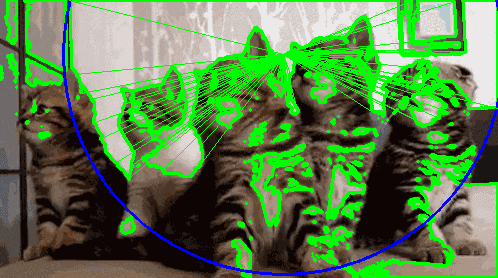

In [10]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/modified_outlined_objects_blue.gif')

In [11]:
import imageio
import cv2
import os

# Load the GIF using imageio
gif = imageio.mimread(outline_save_directory)

processed_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour based on the radius of the enclosing circle
    largest_radius = 0
    largest_contour = None
    for contour in contours:
        (_, _), radius = cv2.minEnclosingCircle(contour)
        if radius > largest_radius:
            largest_radius = radius
            largest_contour = contour

    # Draw the enclosing circle of the largest contour in blue
    (x, y), _ = cv2.minEnclosingCircle(largest_contour)
    cv2.circle(image, (int(x), int(y)), int(largest_radius), (255, 0, 0), 2)

    # Create a mask for the lines drawn from the center to the outline
    line_mask = np.zeros_like(gray)
    for i in range(0, len(largest_contour), 10):
        cv2.line(line_mask, (int(x), int(y)), tuple(largest_contour[i][0]), 255, 1)

    # Check each smaller contour for overlap with the lines
    for contour in contours:
        if cv2.contourArea(contour) < cv2.contourArea(largest_contour):
            mask = np.zeros_like(gray)
            cv2.drawContours(mask, [contour], -1, 255, -1)
            overlap = cv2.bitwise_and(mask, line_mask)
            if not np.any(overlap):
                cv2.drawContours(image, [contour], -1, (255, 255, 255), -1)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    processed_frames.append(processed_frame)

# Save the processed frames as a new animated GIF using imageio
imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects2.gif'), processed_frames, duration=0.1)


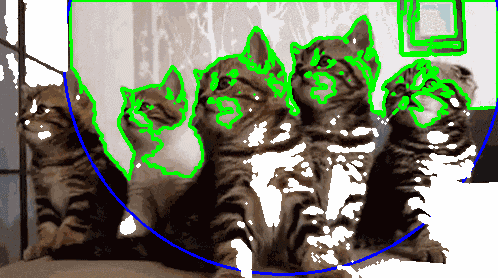

In [12]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/modified_outlined_objects2.gif')

In [13]:
!pip install scikit-image



Skeleton Draft
import imageio
import cv2
import os
from skimage.morphology import skeletonize
from skimage.color import rgb2gray

# Load the GIF using imageio
gif_path = "path_to_your_gif.gif"  # Replace with your GIF path
gif = imageio.mimread(gif_path)

skeletonized_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Normalize the thresholded image to [0, 1] and skeletonize
    skeleton = skeletonize(thresh / 255)
    
    # Convert the skeleton back to [0, 255] range
    skeleton_255 = (skeleton * 255).astype(np.uint8)
    
    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(skeleton_255, cv2.COLOR_GRAY2RGBA)
    skeletonized_frames.append(processed_frame)

# Save the skeletonized frames as a new animated GIF using imageio
save_directory = "path_to_save_directory"  # Replace with your desired save directory
imageio.mimsave(os.path.join(save_directory, 'skeletonized_objects.gif'), skeletonized_frames, duration=0.1)


In [14]:
import imageio
import cv2
import os
from skimage.morphology import skeletonize
from skimage.color import rgb2gray

# Load the GIF using imageio
gif_path = outline_save_directory  # Replace with your GIF path
gif = imageio.mimread(gif_path)

skeletonized_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Normalize the thresholded image to [0, 1] and skeletonize
    skeleton = skeletonize(thresh / 255)

    # Convert the skeleton back to [0, 255] range
    skeleton_255 = (skeleton * 255).astype(np.uint8)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(skeleton_255, cv2.COLOR_GRAY2RGBA)
    skeletonized_frames.append(processed_frame)

save_directory = '/content/drive/MyDrive/AAAI/'

# Save the skeletonized frames as a new animated GIF using imageio
imageio.mimsave(os.path.join(save_directory, 'skeletonized_objects.gif'), skeletonized_frames, duration=0.1)


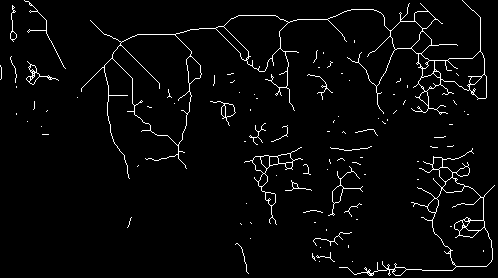

In [15]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/skeletonized_objects.gif')

# **Skeleton draft**

In [16]:
import imageio
import cv2
import os
from skimage.morphology import skeletonize
from skimage.color import rgb2gray

# Load the GIF using imageio
#gif = imageio.mimread('/content/drive/MyDrive/AAAI/cheetah (5).gif')
gifh = imageio.mimread(save_path)
skeletonized_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Normalize the thresholded image to [0, 1] and skeletonize
    skeleton = skeletonize(thresh / 255)

    # Convert the skeleton back to [0, 255] range
    skeleton_255 = (skeleton * 255).astype(np.uint8)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(skeleton_255, cv2.COLOR_GRAY2RGBA)
    skeletonized_frames.append(processed_frame)

save_directory = '/content/drive/MyDrive/AAAI/'

# Save the skeletonized frames as a new animated GIF using imageio
imageio.mimsave(os.path.join(save_directory, 'skeletonized_objects2.gif'), skeletonized_frames, duration=0.1)


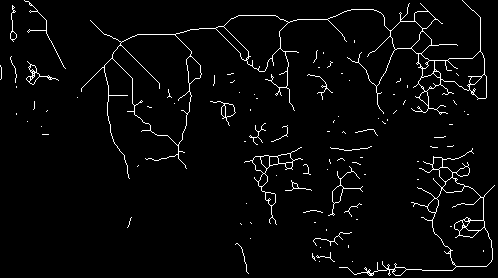

In [17]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/skeletonized_objects2.gif')

## **Motion Detection**

In [18]:
import cv2
import imageio

# Load the GIF using imageio
#gif_path = "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# Initialize the background model with the first frame
background_model = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and background model
    diff = cv2.absdiff(gray_frame, background_model)

    # Threshold the difference to get a binary image
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to clean up the binary image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    thresh = cv2.dilate(thresh, kernel, iterations=2)
    thresh = cv2.erode(thresh, kernel, iterations=1)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected.gif'), motion_detected_frames, duration=0.1)


In [20]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected.gif')

Output hidden; open in https://colab.research.google.com to view.

In [20]:
import cv2
import imageio

# Load the GIF using imageio
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# Initialize the background model with the first frame
background_model = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and background model
    diff = cv2.absdiff(gray_frame, background_model)

    # Threshold the difference to get a binary image
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to clean up the binary image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    thresh = cv2.dilate(thresh, kernel, iterations=2)
    thresh = cv2.erode(thresh, kernel, iterations=1)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw circles on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            # Calculate the centroid of the contour
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0

            # Calculate the radius based on the contour's area
            radius = int((cv2.contourArea(contour) / 3.14) ** 0.5)

            # Draw the circle
            cv2.circle(frame, (cX, cY), radius, (0, 255, 0), 2)

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected_circles.gif'), motion_detected_frames, duration=0.1)


In [21]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected_circles.gif')

Output hidden; open in https://colab.research.google.com to view.

In [22]:
import cv2
import imageio

# Load the GIF using imageio
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# Initialize the background model with the first frame
background_model = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and background model
    diff = cv2.absdiff(gray_frame, background_model)

    # Threshold the difference to get a binary image
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to clean up the binary image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    thresh = cv2.dilate(thresh, kernel, iterations=2)
    thresh = cv2.erode(thresh, kernel, iterations=1)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw circles on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            x, y, w, h = cv2.boundingRect(contour)

            # Calculate the radius based on the contour's area
            radius = int((cv2.contourArea(contour) / (3 * 3.14)) ** 0.5)

            # Split based on width and height
            if w > h:  # Split horizontally
                centroids = [(x + w//6, y + h//2), (x + w//2, y + h//2), (x + 5*w//6, y + h//2)]
            else:  # Split vertically
                centroids = [(x + w//2, y + h//6), (x + w//2, y + h//2), (x + w//2, y + 5*h//6)]

            for cX, cY in centroids:
                # Draw the circle
                cv2.circle(frame, (cX, cY), radius, (0, 255, 0), 2)

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected_3circles.gif'), motion_detected_frames, duration=0.1)

In [23]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected_3circles.gif')

Output hidden; open in https://colab.research.google.com to view.

In [24]:
import cv2
import imageio
import numpy as np

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the frame to get a binary image
    _, thresh = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw circles on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            (x, y), main_radius = cv2.minEnclosingCircle(contour)

            # Calculate the radius for the three smaller circles
            small_radius = int(main_radius / 4)

            # Calculate the positions for the three smaller circles (always horizontal)
            offsets = [-small_radius * 1.5, 0, small_radius * 1.5]
            centroids = [(int(x + offset), int(y)) for offset in offsets]

            for cX, cY in centroids:
                # Draw the circle
                cv2.circle(frame, (cX, cY), small_radius, (0, 255, 0), 2)

                # Draw the line from the center of the small circle to the outline of the object
                for point in contour:
                    point = point[0]
                    angle = np.arctan2(point[1] - cY, point[0] - cX)
                    endX = int(cX + small_radius * np.cos(angle))
                    endY = int(cY + small_radius * np.sin(angle))
                    cv2.line(frame, (cX, cY), (endX, endY), (0, 255, 255), 2)  # Yellow line

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected_circlesV4.gif'), motion_detected_frames, duration=0.1)

In [25]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected_circlesV4.gif')

Output hidden; open in https://colab.research.google.com to view.

In [26]:
import cv2
import imageio
import numpy as np

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the frame to get a binary image
    _, thresh = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw circles on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            (x, y), main_radius = cv2.minEnclosingCircle(contour)

            # Calculate the radius for the three smaller circles
            small_radius = int(main_radius / 3)

            # Calculate the positions for the three smaller circles (always horizontal)
            offsets = [-small_radius, 0, small_radius]
            centroids = [(int(x + offset), int(y)) for offset in offsets]

            for cX, cY in centroids:
                # Draw the circle
                cv2.circle(frame, (cX, cY), small_radius, (0, 255, 0), 2)

                # Draw the line from the center of the small circle to every 10th pixel of the object's outline
                for i, point in enumerate(contour):
                    if i % 10 == 0:
                        point = point[0]
                        angle = np.arctan2(point[1] - cY, point[0] - cX)
                        endX = int(cX + small_radius * np.cos(angle))
                        endY = int(cY + small_radius * np.sin(angle))
                        cv2.line(frame, (cX, cY), (endX, endY), (0, 255, 255), 2)  # Yellow line

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected_circlesV5.gif'), motion_detected_frames, duration=0.1)


In [27]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected_circlesV5.gif')

Output hidden; open in https://colab.research.google.com to view.

In [28]:
import cv2
import imageio
import numpy as np

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# List to store the outline points for each frame
outlines = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the frame to get a binary image
    _, thresh = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract the largest contour (assuming it's the main object)
    if contours:
        main_contour = max(contours, key=cv2.contourArea)
        outline_points = [(point[0][0], point[0][1]) for point in main_contour]
        outlines.append(outline_points)

# Now, the 'outlines' list contains the (x, y) coordinates of the outline points for each frame
print(outlines)


[[(0, 0), (0, 147), (4, 147), (5, 148), (4, 149), (6, 151), (4, 153), (3, 153), (2, 152), (0, 152), (0, 190), (3, 190), (4, 189), (5, 189), (6, 188), (7, 188), (9, 186), (13, 186), (14, 187), (14, 188), (13, 189), (12, 189), (12, 190), (11, 191), (10, 191), (9, 192), (8, 192), (6, 194), (5, 194), (4, 195), (3, 194), (3, 198), (4, 199), (3, 200), (3, 201), (4, 202), (5, 201), (6, 201), (7, 202), (8, 201), (9, 201), (10, 202), (11, 201), (12, 201), (13, 202), (12, 203), (13, 202), (14, 203), (14, 204), (15, 203), (16, 204), (18, 204), (19, 205), (19, 203), (20, 202), (25, 202), (26, 201), (27, 201), (28, 202), (29, 202), (30, 203), (27, 206), (26, 206), (26, 208), (29, 208), (30, 207), (31, 208), (31, 209), (32, 210), (33, 210), (33, 207), (32, 206), (32, 204), (33, 203), (38, 203), (39, 202), (42, 202), (43, 203), (44, 203), (44, 202), (42, 200), (43, 199), (44, 199), (46, 201), (47, 201), (49, 203), (49, 204), (50, 204), (50, 203), (51, 202), (52, 202), (53, 203), (53, 205), (54, 206),

## **Point Array**

In [29]:
import cv2
import imageio
import numpy as np
import csv

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# List to store the outline points for each frame
outlines = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the frame to get a binary image
    _, thresh = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract the largest contour (assuming it's the main object)
    if contours:
        main_contour = max(contours, key=cv2.contourArea)
        outline_points = [(point[0][0], point[0][1]) for point in main_contour]
        outlines.append(outline_points)

mypath = os.path.join(save_directory, 'outlines.csv')

# Save the outline points to a CSV file
with open(mypath, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Frame", "X", "Y"])  # Header row
    for frame_num, outline in enumerate(outlines):
        for point in outline:
            writer.writerow([frame_num] + list(point))


In [30]:
#import cv2
import imageio
import numpy as np

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# List to store the frames with only the green outlines
green_outline_frames = []

for frame in frames:
    # Create a mask where the green channel is dominant
    green_mask = np.where((frame[:,:,1] > frame[:,:,0]) & (frame[:,:,1] > frame[:,:,2]), 1, 0).astype(np.uint8)

    # Use the mask to extract the green outlines from the original frame
    green_outlines = cv2.bitwise_and(frame, frame, mask=green_mask)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(green_outlines, cv2.COLOR_BGR2RGBA)
    green_outline_frames.append(processed_frame)

imageio.mimsave(os.path.join(save_directory, 'green_outlines_only.gif'), motion_detected_frames, duration=0.1)


In [31]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/green_outlines_only.gif')

Output hidden; open in https://colab.research.google.com to view.

In [32]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/outlined_objectsV7.gif')

Output hidden; open in https://colab.research.google.com to view.

GIF of Outline

In [33]:
import imageio
import cv2
import numpy as np
import os

# Read the GIF file
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank black image of the same size as the frame
    blank_image = np.zeros_like(frame)

    # Draw contours on the blank image
    outline = cv2.drawContours(blank_image, contours, -1, (0, 255, 0), 2)

    # Ensure the outline has only 3 channels (RGB)
    outline = outline[:, :, :3]

    outlines.append(outline)

# Save the frames with outlines as a new GIF
outline_save_directory = os.path.join(save_directory, 'outlined_objects2.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1)
print(outline_save_directory)


/content/drive/MyDrive/AAAI/outlined_objects2.gif


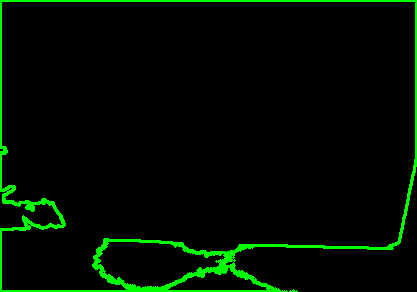

In [34]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/outlined_objects2.gif')

In [35]:
import imageio
import cv2
import numpy as np
import os
from skimage.morphology import skeletonize

# Read the GIF file
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGBA2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank black image of the same size as the frame with 3 channels (RGB)
    blank_image = np.zeros((frame.shape[0], frame.shape[1], 3), dtype=np.uint8)

    # Fill the object within the outline with red color
    cv2.drawContours(blank_image, contours, -1, (0, 0, 255), -1)  # -1 fill the contour

    # Compute the skeleton of the object
    skeleton = skeletonize(thresh == 255)
    skeleton = np.array(skeleton, dtype=np.uint8) * 255

    # Overlay the yellow skeleton on the red object
    blank_image[skeleton == 255, :] = [0, 255, 255]  # Set the skeleton pixels to yellow

    outlines.append(blank_image)

# Save the frames with outlines as a new GIF
outline_save_directory = os.path.join(save_directory, 'outlined_objects_with_skeleton3.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1)
print(outline_save_directory)



/content/drive/MyDrive/AAAI/outlined_objects_with_skeleton3.gif


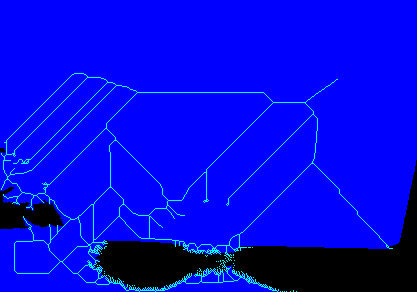

In [36]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/outlined_objects_with_skeleton3.gif')

In [37]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

def compute_skeleton(frame):
    """Compute the skeleton of a binary frame."""
    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Binarize the image
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    # Compute the skeleton
    skeleton = skeletonize(binary // 255)
    return skeleton.astype(np.uint8) * 255

def detect_motion(skeleton_prev, skeleton_curr):
    """Detect motion by comparing two skeletons."""
    # Compute the difference between the two skeletons
    diff = cv2.absdiff(skeleton_prev, skeleton_curr)
    # Apply a threshold to detect significant motion
    _, motion_mask = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)
    return motion_mask

# Load the video or sequence of frames
cap = cv2.VideoCapture('/content/drive/MyDrive/AAAI/mov_bbb.mp4')

ret, frame_prev = cap.read()
skeleton_prev = compute_skeleton(frame_prev)

while True:
    ret, frame_curr = cap.read()
    if not ret:
        break

    skeleton_curr = compute_skeleton(frame_curr)
    motion_mask = detect_motion(skeleton_prev, skeleton_curr)

    # Highlight areas of motion in the frame
    frame_curr[motion_mask == 255] = [0, 0, 255]  # Red color for motion areas

    cv2_imshow(frame_curr)  # Display the frame in Colab

    # Update the previous frame and skeleton
    frame_prev = frame_curr.copy()
    skeleton_prev = skeleton_curr.copy()

cap.release()


Output hidden; open in https://colab.research.google.com to view.

## **3D**

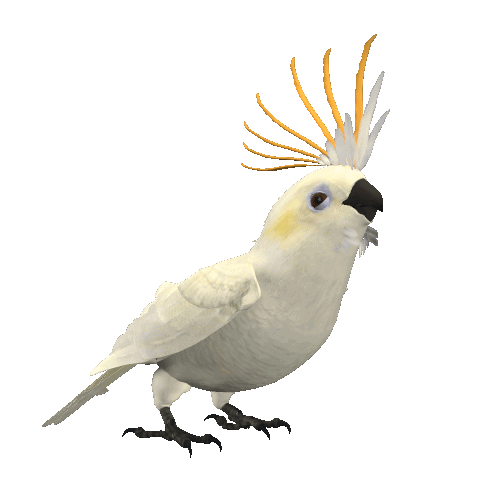

In [38]:
from IPython.display import Image

# Display the outlined GIF
Image(filename= '/content/drive/MyDrive/AAAI/3D2.gif')

In [39]:
import numpy as np
import imageio
from skimage.morphology import skeletonize_3d
from skimage.filters import sobel
from skimage import img_as_ubyte, color
from skimage.transform import resize
# Load the 3D GIF
gif_path = '/content/drive/MyDrive/AAAI/3D2.gif'  # <-- Replace this with your actual path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Print the shapes of the frames for debugging
for i, frame in enumerate(frames):
    print(f"Frame {i} shape: {frame.shape}")

# Determine the shape of the first frame
reference_shape = frames[0].shape[:2]  # Only take the spatial dimensions

# Resize all frames to the shape of the first frame and convert to grayscale
# Extract only the first three channels (RGB) before converting
resized_frames = [resize(color.rgb2gray(frame[:, :, :3]), reference_shape, mode='reflect', anti_aliasing=True) for frame in frames]

# Construct the 3D volume from the resized 2D slices
volume = np.stack(resized_frames, axis=-1)

# 3D Outlining using Sobel filter
edges = sobel(volume)

# Binarize the edges
binary_edges = (edges > np.percentile(edges, 95)).astype(np.uint8)

# 3D Skeletonization
skeleton = skeletonize_3d(binary_edges)

# At this point, `skeleton` contains the 3D skeleton of your object.
# You can visualize it using appropriate 3D visualization tools or save it for further processing.



Frame 0 shape: (500, 500, 3)
Frame 1 shape: (500, 500, 4)
Frame 2 shape: (500, 500, 4)
Frame 3 shape: (500, 500, 4)
Frame 4 shape: (500, 500, 4)
Frame 5 shape: (500, 500, 4)
Frame 6 shape: (500, 500, 4)
Frame 7 shape: (500, 500, 4)
Frame 8 shape: (500, 500, 4)
Frame 9 shape: (500, 500, 4)
Frame 10 shape: (500, 500, 4)
Frame 11 shape: (500, 500, 4)
Frame 12 shape: (500, 500, 4)
Frame 13 shape: (500, 500, 4)
Frame 14 shape: (500, 500, 4)
Frame 15 shape: (500, 500, 4)
Frame 16 shape: (500, 500, 4)
Frame 17 shape: (500, 500, 4)
Frame 18 shape: (500, 500, 4)
Frame 19 shape: (500, 500, 4)
Frame 20 shape: (500, 500, 4)
Frame 21 shape: (500, 500, 4)
Frame 22 shape: (500, 500, 4)
Frame 23 shape: (500, 500, 4)
Frame 24 shape: (500, 500, 4)
Frame 25 shape: (500, 500, 4)
Frame 26 shape: (500, 500, 4)
Frame 27 shape: (500, 500, 4)
Frame 28 shape: (500, 500, 4)
Frame 29 shape: (500, 500, 4)
Frame 30 shape: (500, 500, 4)
Frame 31 shape: (500, 500, 4)
Frame 32 shape: (500, 500, 4)
Frame 33 shape: (500

In [40]:
print("Shape of binary_skeleton:", binary_skeleton.shape)
print("Unique values in binary_skeleton:", np.unique(binary_skeleton))
print("Number of non-zero values:", np.sum(binary_skeleton))


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

def plot_3d_slices(data, step=10):
    """Visualize slices of 3D data."""
    fig, axes = plt.subplots(nrows=1, ncols=data.shape[2] // step, figsize=(15, 5))
    for i in range(0, data.shape[2], step):
        axes[i // step].imshow(data[:, :, i], cmap='gray')
        axes[i // step].set_title(f"Slice {i}")
        axes[i // step].axis('off')
    plt.tight_layout()
    plt.show()

plot_3d_slices(binary_skeleton)


In [ ]:
!pip install ipyvolume


In [ ]:
import numpy as np
import ipyvolume as ipv

# Ensure the skeleton is binary
binary_skeleton = np.where(skeleton > 0, 1, 0)

# Visualize the binary skeleton
ipv.quickvolshow(binary_skeleton, level=[0.5], opacity=0.5, level_width=0.5, data_min=0, data_max=1)



In [ ]:
!pip install itkwidgets


In [ ]:
import itkwidgets as itk

# Visualize the skeleton
itk.view(binary_skeleton)


In [ ]:
# Install the necessary libraries
!pip install itkwidgets SimpleITK

import SimpleITK as sitk
from itkwidgets import view

# Convert the numpy array to a SimpleITK Image
skeleton_image = sitk.GetImageFromArray(skeleton)

# Save the skeletonized result as a NIFTI file
output_path = 'skeletonized_output.nii'
sitk.WriteImage(skeleton_image, output_path)

# Visualize the 3D skeleton
view(skeleton_image)


In [ ]:
import numpy as np
import nibabel as nib
from skimage.morphology import skeletonize_3d
from skimage.filters import sobel
from skimage import img_as_ubyte

# Load two consecutive 3D volumes
img1 = nib.load('path_to_3D_image_1.nii.gz')
img2 = nib.load('path_to_3D_image_2.nii.gz')
volume1 = img1.get_fdata()
volume2 = img2.get_fdata()

# 3D Outlining using Sobel filter
edges1 = sobel(volume1)
edges2 = sobel(volume2)

# Binarize the volumes based on a threshold (adjust as needed)
binary_volume1 = (edges1 > 0.5).astype(np.uint8)
binary_volume2 = (edges2 > 0.5).astype(np.uint8)

# Compute the 3D skeleton
skeleton1 = skeletonize_3d(binary_volume1)
skeleton2 = skeletonize_3d(binary_volume2)

# Save the skeletons as new 3D volumes
skeleton_img1 = nib.Nifti1Image(skeleton1.astype(np.float32), img1.affine)
nib.save(skeleton_img1, 'skeleton_1.nii.gz')
skeleton_img2 = nib.Nifti1Image(skeleton2.astype(np.float32), img2.affine)
nib.save(skeleton_img2, 'skeleton_2.nii.gz')

# 3D Motion Detection
motion_mask = np.abs(volume2 - volume1) > motion_threshold  # Define an appropriate threshold

# Save the motion mask as a new 3D volume
motion_img = nib.Nifti1Image(motion_mask.astype(np.float32), img1.affine)
nib.save(motion_img, 'motion_mask.nii.gz')
